# **Exploring GroupBy: Split,Apply,Combine** 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('data.csv')

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

In [6]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,25.693381,0.105729,117.006500,0.524533,1977.061764
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,21.872740,0.182260,30.254178,0.264477,26.907950
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,1.000000,0.035200,93.931000,0.311000,1955.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,25.000000,0.045500,115.816000,0.536000,1977.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,42.000000,0.076300,135.011000,0.743000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [8]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,['Roger Fly'],0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [28]:
print('For popularity column:')
print('Median is:',df['popularity'].median())
print('Mean is:',df['popularity'].mean())
print('Mean is:',df['popularity'].sum()/df['popularity'].count())
print('Standard Deviation is:',df['popularity'].std())
print('Variation is:',df['popularity'].var())

For popularity column:
Median is: 25.0
Mean is: 25.693380889849703
Mean is: 25.693380889849703
Standard Deviation is: 21.87273982695016
Variation is: 478.4167475374517


In [37]:
grp1=df.groupby('artists')['year'].count()
grp1


artists
["'In The Heights' Original Broadway Company", 'Mandy Gonzalez']    1
["'Til Tuesday"]                                                    8
["100 First Songs' Participants"]                                   1
["AKA ChaP in 00'S"]                                                2
["Adolescent's Orquesta"]                                           4
                                                                   ..
['黑豹']                                                              1
['龔詩嘉']                                                             1
['김수철']                                                             1
['김효근', 'Quinever 퀸에버']                                             1
['조정현']                                                             1
Name: year, Length: 36195, dtype: int64

In [55]:
grp1.index.get_level_values(0).tolist()

['["\'In The Heights\' Original Broadway Company", \'Mandy Gonzalez\']',
 '["\'Til Tuesday"]',
 '["100 First Songs\' Participants"]',
 '["AKA ChaP in 00\'S"]',
 '["Adolescent\'s Orquesta"]',
 '["Aidan O\'Rourke", \'Kit Downes\']',
 '["Alan Davey\'s Eclectic Devils"]',
 '["Alex D\'Elia", \'Nihil Young\']',
 '["Alexander \'Skip\' Spence"]',
 '["Alexander O\'Neal", \'Cherrelle\']',
 '["Alexander O\'Neal"]',
 '["Alexis Korner\'s Blues Incorporated"]',
 '["Alive \'N Kickin\'"]',
 '["Amy Hanaiali\'i", \'Willie K\']',
 '["Anita O\'Day", \'Billy May Orchestra\']',
 '["Anita O\'Day", \'Gene Krupa & His Orchestra\', \'Roy Eldridge\']',
 '["Anita O\'Day", \'Gene Krupa & His Orchestra\']',
 '["Anita O\'Day", \'Marty Paich & His Orchestra\']',
 '["Anita O\'Day", \'Oscar Peterson Quartet\']',
 '["Anita O\'Day", \'Russ Garcia and His Orchestra\']',
 '["Anita O\'Day", \'The Three Sounds\']',
 '["Anita O\'Day"]',
 '["Athena\'s Fury"]',
 '["Auli\'i Cravalho", \'Vai Mahina\', "Olivia Foa\'i", "Opetaia Fo

In [63]:
grp1_df=grp1.reset_index() # can use set_index(['artists']) to change numeric indexing
grp1_df

,artists,year
0,"[""'In The Heights' Original Broadway Company"",...",1
1,"[""'Til Tuesday""]",8
2,"[""100 First Songs' Participants""]",1
3,"[""AKA ChaP in 00'S""]",2
4,"[""Adolescent's Orquesta""]",4
...,...,...
36190,['黑豹'],1
36191,['龔詩嘉'],1
36192,['김수철'],1
36193,"['김효근', 'Quinever 퀸에버']",1


In [75]:
mx_ind=grp1_df.index[grp1_df['year']==grp1_df['year'].max()]     # finding index of artist with maximum albums in lifetime
grp1_df.values[mx_ind]

array([["['Tadeusz Dolega Mostowicz']", 1281]], dtype=object)

In [79]:
for (year, group) in df.groupby('year'):
    print("{0} shape={1}".format(year,group.shape))

1920 shape=(349, 19)
1921 shape=(156, 19)
1922 shape=(121, 19)
1923 shape=(185, 19)
1924 shape=(236, 19)
1925 shape=(279, 19)
1926 shape=(1329, 19)
1927 shape=(750, 19)
1928 shape=(1275, 19)
1929 shape=(951, 19)
1930 shape=(1886, 19)
1931 shape=(968, 19)
1932 shape=(782, 19)
1933 shape=(702, 19)
1934 shape=(582, 19)
1935 shape=(1561, 19)
1936 shape=(2000, 19)
1937 shape=(661, 19)
1938 shape=(622, 19)
1939 shape=(1000, 19)
1940 shape=(1924, 19)
1941 shape=(967, 19)
1942 shape=(1691, 19)
1943 shape=(714, 19)
1944 shape=(771, 19)
1945 shape=(2000, 19)
1946 shape=(1738, 19)
1947 shape=(1688, 19)
1948 shape=(2000, 19)
1949 shape=(2000, 19)
1950 shape=(2000, 19)
1951 shape=(2000, 19)
1952 shape=(2000, 19)
1953 shape=(2000, 19)
1954 shape=(2000, 19)
1955 shape=(2000, 19)
1956 shape=(2000, 19)
1957 shape=(2000, 19)
1958 shape=(2000, 19)
1959 shape=(2000, 19)
1960 shape=(2000, 19)
1961 shape=(2000, 19)
1962 shape=(2000, 19)
1963 shape=(2000, 19)
1964 shape=(2001, 19)
1965 shape=(2002, 19)
1966 

C:\Users\gaming-pc\Ananconda2021\envs\Deeplearning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


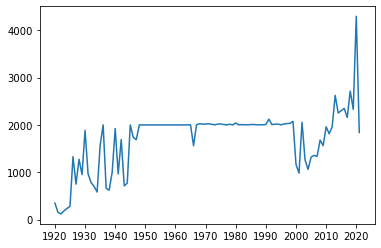

In [106]:
x=[]
y=[]
for (year,group) in df.groupby('year'):
    x.append(year)
    y.append(group.shape[0])
fig,axes=plt.subplots()
sns.lineplot(x,y)
axes.set_xticks(range(1920,2022,10))
plt.show()

In [105]:
df_2=df.groupby(['year','explicit'],as_index=False)['id'].count()
df_2

,year,explicit,id
0,1920,0,306
1,1920,1,43
2,1921,0,145
3,1921,1,11
4,1922,0,121
...,...,...,...
176,2019,1,548
177,2020,0,3541
178,2020,1,753
179,2021,0,1643


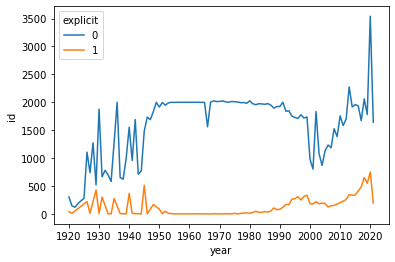

In [107]:
fig,axes=plt.subplots()
sns.lineplot(data=df_2,x='year',y='id',hue='explicit')
axes.set_xticks(range(1920,2022,10))
plt.show()

In [137]:
df.groupby('explicit')[['energy','loudness']].aggregate(['min','median','max','count'])

energy                     loudness                        
              min median  max   count      min   median    max   count
explicit                                                              
0         0.00000  0.452  1.0  162507  -60.000 -11.0360  3.855  162507
1         0.00002  0.629  1.0   11882  -36.315  -7.4965  0.977   11882

In [128]:
df_2=df[df['energy']>0.7]
df_2.reset_index(drop=True)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.128,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
1,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.402,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
2,0.006820,['Meetya'],0.571,476304,0.753,0,06NUxS2XL3efRh0bloxkHm,0.873000,8,0.092,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920
3,0.004780,['Justrock'],0.643,304078,0.998,0,0DH1IROKoPK5XTglUt9Pq0,0.476000,1,0.105,-6.120,1,Schumacher,0,1920-01-01,0.0566,124.018,0.6390,1920
4,0.080800,['Tr0ma'],0.389,774360,0.810,0,0RdLX7r5HrPOGQabZIjCfi,0.918000,1,0.332,-11.132,1,Big Rip,0,1920-01-01,0.1090,161.322,0.0710,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45264,0.010700,['Turbotronic'],0.871,186462,0.829,0,7hgQIprymmyuwLkmI3MPAZ,0.000163,6,0.238,-1.847,0,Come On - Radio Edit,0,2020-12-25,0.1020,130.015,0.4840,2020
45265,0.005160,['Febration'],0.665,183307,0.926,0,4QRXELBqRwQQjd366OG1Do,0.004280,1,0.124,-4.571,1,Forever In Paradise,0,2020-12-25,0.0651,126.914,0.1280,2020
45266,0.015600,"['Elyamont', 'Cristina Soto']",0.708,191341,0.849,0,54NeJ65oDIydq9jr0b8qjg,0.000000,0,0.146,-2.579,1,Signals - Radio Edit,0,2020-12-25,0.0457,123.052,0.4520,2020
45267,0.048400,"['Stephan F', 'YA-YA']",0.693,177148,0.826,0,1Cbf6PLWsL4s51eFepXx6L,0.000012,1,0.231,-2.669,1,Only Tonight - Radio Edit,0,2020-12-25,0.0762,126.049,0.3610,2020


In [131]:
def filter_func(x):
    return x['liveness'].std()>0.1

df_2.groupby('artists').filter(filter_func)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
22,0.080800,['Tr0ma'],0.389,774360,0.810,0,0RdLX7r5HrPOGQabZIjCfi,0.918000,1,0.3320,-11.132,1,Big Rip,0,1920-01-01,0.1090,161.322,0.071,1920
45,0.000017,['Tr0ma'],0.490,454776,0.922,0,0w1niwodVUkILevvugjgNa,0.855000,1,0.1230,-11.961,1,Quantum Fluctuation,0,1920-01-01,0.0771,158.049,0.264,1920
154,0.002940,['696'],0.609,89757,0.838,1,4fGLehaLo7wfTZiCpb7C4q,0.000173,10,0.3580,-6.634,0,Classic Booty,0,1920-01-01,0.1430,150.054,0.153,1920
155,0.014800,['696'],0.594,158407,0.844,1,4jFsBM3wEzUXd9k8H4CL2A,0.000000,10,0.2020,-6.645,0,Curved Fist,2,1920-01-01,0.0740,115.069,0.212,1920
727,0.821000,['Lionel Hampton Orchestra'],0.589,500787,0.895,0,1JKGMzesB5AMCp9Yuqbcjj,0.675000,10,0.5930,-4.295,1,I Got Rhythm,0,1924,0.1030,141.475,0.745,1924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174312,0.002930,['Turbotronic'],0.710,170769,0.978,0,3XNMMYNMXcCLk6AQ1sE4sw,0.145000,4,0.3880,-1.904,0,Gawi Bawi Bo - Radio Edit,0,2020-12-25,0.0622,130.036,0.660,2020
174316,0.012800,['Turbotronic'],0.754,176250,0.961,0,7coQK7fGs7JPDSpOx41Iyg,0.092800,0,0.1240,-1.066,1,Go Up,0,2020-12-25,0.0438,127.997,0.870,2020
174329,0.030200,"[""Why Don't We""]",0.753,167160,0.756,0,6bMEM4D6A6gdhNvJcVgAeJ,0.000004,10,0.0754,-4.662,1,Stay,64,2021-01-15,0.0630,145.948,0.679,2021
174351,0.009840,['Foo Fighters'],0.530,253840,0.759,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,-7.067,1,Waiting On A War,69,2021-01-14,0.0351,131.999,0.502,2021


In [139]:
df['loudness'].apply(np.abs)

0         12.628
1          7.261
2         12.098
3          7.311
4          6.036
           ...  
174384     5.089
174385    11.665
174386    12.393
174387    12.077
174388    12.237
Name: loudness, Length: 174389, dtype: float64

In [140]:
L=[0,1,0,2,1,2,0]
df.head(7).groupby(L)['popularity'].sum()

0    21
1     9
2    26
Name: popularity, dtype: int64